# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key
from pprint import pprint

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy



In [2]:
NUM_POINTS=500

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=NUM_POINTS)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=NUM_POINTS)

#lat_lngs = zip(lats, lngs)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

print (cities)
print(cities[0])
print(city)
print(lat_lngs)


Number of cities in the list: 245
['glace bay', 'tazovsky', 'keflavik', 'nova vicosa', 'puerto san carlos', 'port-aux-francais', 'talnakh', 'kaiapoi', 'west island', 'waitangi', 'nuuk', 'manokwari', 'edinburgh of the seven seas', 'taiohae', 'rabaul', 'bethel', 'yellowknife', 'taunggyi', 'natal', 'westport', 'mar del plata', 'ilulissat', 'puerto baquerizo moreno', 'wailua homesteads', 'asau', 'ancud', 'invercargill', 'new norfolk', 'jamestown', 'bredasdorp', 'iqaluit', 'remire-montjoly', 'chonchi', 'qaqortoq', 'port mathurin', "port saint john's", 'margaret river', 'sisimiut', 'mount isa', 'blackmans bay', 'mujiayingzi', 'adamstown', 'polyarnyy', 'iskateley', 'udachny', 'puerto natales', 'gamba', 'papatowai', 'albany', 'anadyr', 'kabompo', 'chinchilla', 'colonel hill', "st. john's", 'bilibino', 'ribeira grande', "arkhangel'sk", 'grytviken', 'omurtag', 'puerto ayora', 'vadso', 'vila velha', 'krasnoturansk', 'dudinka', 'tiksi', 'coquimbo', "zabaykal'sk", 'ulety', 'mejit', 'saint-philippe'

In [4]:
# Last value of counter lat_lng
print(lat_lng)
print(lat_lng[0])
print(lat_lng[1])

lat_lngs_ls=list(lat_lngs)
print(lat_lngs_ls)

# Visualize elements in zip function
print(type(lat_lngs))
print(type(lat_lngs_ls))
print(list(lat_lngs))


(-5.260582412962965, 92.41877771489618)
-5.260582412962965
92.41877771489618
[]
<class 'zip'>
<class 'list'>
[]


In [5]:
print('\nPrinting the values of zip')
for values in lat_lngs:
    print(values)  # print each tuples


Printing the values of zip


In [6]:
# Print the first API response from cities list created above 
# API call format from: https://openweathermap.org/current#name
# https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}

url = "https://api.openweathermap.org/data/2.5/weather?"
api_key = "&appid=" + weather_api_key
city_url = url+"q="+cities[0]+api_key
print(city_url)
res=requests.get(city_url)
res_json= res.json()
print(res)
print(json.dumps(res_json, indent=4, sort_keys=True))




https://api.openweathermap.org/data/2.5/weather?q=glace bay&appid=39517621031eb893085cd9059b04d1bb
<Response [200]>
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 46.1969,
        "lon": -59.957
    },
    "dt": 1696799094,
    "id": 5961564,
    "main": {
        "feels_like": 289.09,
        "humidity": 96,
        "pressure": 1006,
        "temp": 288.95,
        "temp_max": 289.76,
        "temp_min": 288.4
    },
    "name": "Glace Bay",
    "rain": {
        "1h": 0.49
    },
    "sys": {
        "country": "CA",
        "id": 2030348,
        "sunrise": 1696759613,
        "sunset": 1696800463,
        "type": 2
    },
    "timezone": -10800,
    "visibility": 1609,
    "weather": [
        {
            "description": "light intensity shower rain",
            "icon": "09d",
            "id": 520,
            "main": "Rain"
        },
        {
            "description": "mist",
            "icon": "50d",
      

In [7]:
# Obtain the next parameters of first city of list:
# city_lat, city_lng, city_max_temp,city_humidity,city_clouds,city_wind,city_country,city_date
city_lat = res_json["coord"]["lat"]
city_lng = res_json["coord"]["lon"]
city_max_temp = res_json["main"]["temp_max"]
city_humidity = res_json["main"]["humidity"]
city_clouds = res_json["clouds"]["all"]
city_wind = res_json["wind"]["speed"]
city_date=res_json["dt"]
print(city_date)


1696799094


In [8]:
# Shows each 50 cities enumerated

print(cities)
for i, city in enumerate(cities):
    #print(i)   
    #print(city)     
    if (i % 50 == 0 and i >= 50):
        print(i)
        print(city)

['glace bay', 'tazovsky', 'keflavik', 'nova vicosa', 'puerto san carlos', 'port-aux-francais', 'talnakh', 'kaiapoi', 'west island', 'waitangi', 'nuuk', 'manokwari', 'edinburgh of the seven seas', 'taiohae', 'rabaul', 'bethel', 'yellowknife', 'taunggyi', 'natal', 'westport', 'mar del plata', 'ilulissat', 'puerto baquerizo moreno', 'wailua homesteads', 'asau', 'ancud', 'invercargill', 'new norfolk', 'jamestown', 'bredasdorp', 'iqaluit', 'remire-montjoly', 'chonchi', 'qaqortoq', 'port mathurin', "port saint john's", 'margaret river', 'sisimiut', 'mount isa', 'blackmans bay', 'mujiayingzi', 'adamstown', 'polyarnyy', 'iskateley', 'udachny', 'puerto natales', 'gamba', 'papatowai', 'albany', 'anadyr', 'kabompo', 'chinchilla', 'colonel hill', "st. john's", 'bilibino', 'ribeira grande', "arkhangel'sk", 'grytviken', 'omurtag', 'puerto ayora', 'vadso', 'vila velha', 'krasnoturansk', 'dudinka', 'tiksi', 'coquimbo', "zabaykal'sk", 'ulety', 'mejit', 'saint-philippe', 'olonkinbyen', "nar'yan-mar", 'c

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

api_key = "&appid=" + weather_api_key

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities[:250]):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    # https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}
    # https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}

    #city_url = # YOUR CODE HERE
    city_url = url+"q="+cities[i]+api_key
    print(city_url)
 
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather=requests.get(city_url).json()
        #city_weather = json.dumps(res_json, indent=4, sort_keys=True)
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        pass

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
print(len(city_weather))

    


Beginning Data Retrieval     
-----------------------------
https://api.openweathermap.org/data/2.5/weather?q=glace bay&appid=39517621031eb893085cd9059b04d1bb
Processing Record 1 of Set 1 | glace bay
https://api.openweathermap.org/data/2.5/weather?q=tazovsky&appid=39517621031eb893085cd9059b04d1bb
Processing Record 2 of Set 1 | tazovsky
https://api.openweathermap.org/data/2.5/weather?q=keflavik&appid=39517621031eb893085cd9059b04d1bb
Processing Record 3 of Set 1 | keflavik
https://api.openweathermap.org/data/2.5/weather?q=nova vicosa&appid=39517621031eb893085cd9059b04d1bb
Processing Record 4 of Set 1 | nova vicosa
https://api.openweathermap.org/data/2.5/weather?q=puerto san carlos&appid=39517621031eb893085cd9059b04d1bb
Processing Record 5 of Set 1 | puerto san carlos
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?q=port-aux-francais&appid=39517621031eb893085cd9059b04d1bb
Processing Record 6 of Set 1 | port-aux-francais
https://api.openweathermap.org/data/2.5/

In [12]:
pprint(city_data, indent=4, sort_dicts=True)

[   {   'City': 'glace bay',
        'Cloudiness': 100,
        'Country': 'CA',
        'Date': 1696801460,
        'Humidity': 96,
        'Lat': 46.1969,
        'Lng': -59.957,
        'Max Temp': 289.7,
        'Wind Speed': 10.29},
    {   'City': 'tazovsky',
        'Cloudiness': 98,
        'Country': 'RU',
        'Date': 1696801460,
        'Humidity': 98,
        'Lat': 67.4667,
        'Lng': 78.7,
        'Max Temp': 279.32,
        'Wind Speed': 3.78},
    {   'City': 'keflavik',
        'Cloudiness': 100,
        'Country': 'IS',
        'Date': 1696801461,
        'Humidity': 81,
        'Lat': 64.0049,
        'Lng': -22.5624,
        'Max Temp': 282.39,
        'Wind Speed': 11.32},
    {   'City': 'nova vicosa',
        'Cloudiness': 0,
        'Country': 'BR',
        'Date': 1696801461,
        'Humidity': 76,
        'Lat': -17.8919,
        'Lng': -39.3719,
        'Max Temp': 298,
        'Wind Speed': 6.31},
    {   'City': 'port-aux-francais',
        'Cloudin

In [13]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,glace bay,46.1969,-59.9570,289.70,96,100,10.29,CA,1696801460
1,tazovsky,67.4667,78.7000,279.32,98,98,3.78,RU,1696801460
2,keflavik,64.0049,-22.5624,282.39,81,100,11.32,IS,1696801461
3,nova vicosa,-17.8919,-39.3719,298.00,76,0,6.31,BR,1696801461
4,port-aux-francais,-49.3500,70.2167,279.91,97,100,20.57,TF,1696801462
...,...,...,...,...,...,...,...,...,...
234,afaahiti,-17.7500,-149.2833,301.08,83,93,8.23,PF,1696801567
235,porto novo,6.4965,2.6036,298.66,86,61,2.00,BJ,1696801568
236,crane,31.3974,-102.3501,299.36,33,0,4.88,US,1696801569
237,selfoss,63.9331,-20.9971,281.51,80,100,7.58,IS,1696801569


In [14]:
# Show Record Count

print(len(city_data_df))

city_data_df.count()

239


City          239
Lat           239
Lng           239
Max Temp      239
Humidity      239
Cloudiness    239
Wind Speed    239
Country       239
Date          239
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,glace bay,46.1969,-59.9570,289.70,96,100,10.29,CA,1696801460
1,tazovsky,67.4667,78.7000,279.32,98,98,3.78,RU,1696801460
2,keflavik,64.0049,-22.5624,282.39,81,100,11.32,IS,1696801461
3,nova vicosa,-17.8919,-39.3719,298.00,76,0,6.31,BR,1696801461
4,port-aux-francais,-49.3500,70.2167,279.91,97,100,20.57,TF,1696801462


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [17]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,glace bay,46.1969,-59.9570,289.70,96,100,10.29,CA,1696801460
1,tazovsky,67.4667,78.7000,279.32,98,98,3.78,RU,1696801460
2,keflavik,64.0049,-22.5624,282.39,81,100,11.32,IS,1696801461
3,nova vicosa,-17.8919,-39.3719,298.00,76,0,6.31,BR,1696801461
4,port-aux-francais,-49.3500,70.2167,279.91,97,100,20.57,TF,1696801462


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

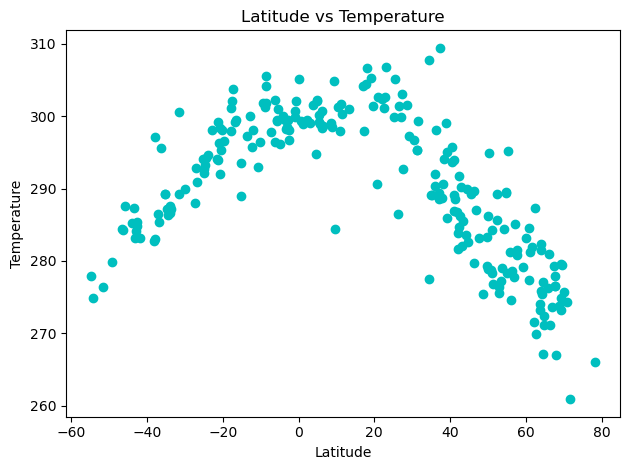

In [21]:
# Build scatter plot for latitude vs. temperature
#print(city_lat)
#print(city_max_temp)
#print(city_data_df['Lat'])
latitude = city_data_df['Lat']
temperature = city_data_df ['Max Temp']

graph1=plt.scatter(latitude, temperature, color="c", marker="o")

# Incorporate the other graph properties
# LABELS
plt.title("Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

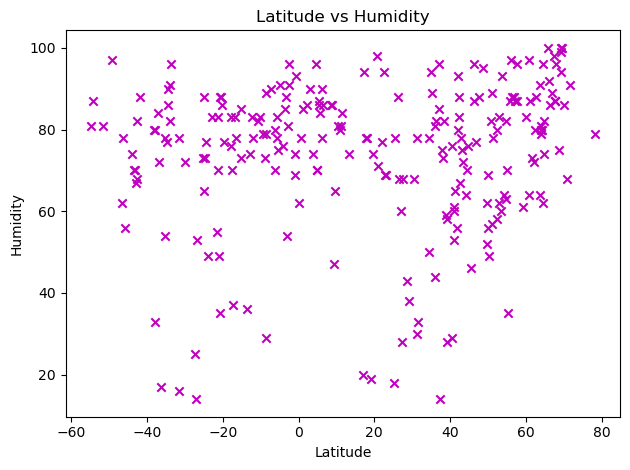

In [22]:
# Build the scatter plots for latitude vs. humidity
#print(city_humidity)
humidity = city_data_df['Humidity']
graph2 = plt.scatter(latitude, humidity, color='m', marker='x')

# Incorporate the other graph properties
# LABELS
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

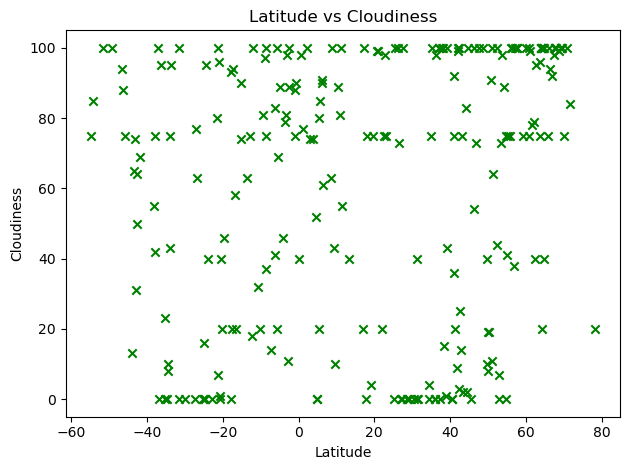

In [27]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df['Cloudiness']
plt.scatter(latitude,cloudiness,color='g', marker='x')

# Incorporate the other graph properties
# LABELS
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

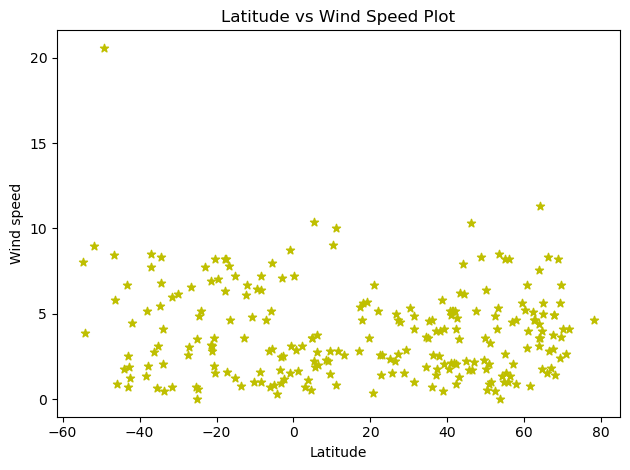

In [31]:
# Build the scatter plots for latitude vs. wind speed
windspeed=city_data_df['Wind Speed']
plt.scatter(latitude,windspeed,color='y',marker='*')

# Incorporate the other graph properties
# LABELS
plt.title("Latitude vs Wind Speed Plot")
plt.xlabel("Latitude")
plt.ylabel("Wind speed")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [32]:
# Define a function to create Linear Regression plots
linear_data_df=city_data_df
linear_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,glace bay,46.1969,-59.9570,289.70,96,100,10.29,CA,1696801460
1,tazovsky,67.4667,78.7000,279.32,98,98,3.78,RU,1696801460
2,keflavik,64.0049,-22.5624,282.39,81,100,11.32,IS,1696801461
3,nova vicosa,-17.8919,-39.3719,298.00,76,0,6.31,BR,1696801461
4,port-aux-francais,-49.3500,70.2167,279.91,97,100,20.57,TF,1696801462
...,...,...,...,...,...,...,...,...,...
234,afaahiti,-17.7500,-149.2833,301.08,83,93,8.23,PF,1696801567
235,porto novo,6.4965,2.6036,298.66,86,61,2.00,BJ,1696801568
236,crane,31.3974,-102.3501,299.36,33,0,4.88,US,1696801569


In [33]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
#d = {'col1': [1, 2], 'col2': [3, 4]}
#df = pd.DataFrame(data=d)

northern_hemi_df=pd.DataFrame(linear_data_df.loc[linear_data_df["Lat"]>=0,:])
northern_hemi_df

# Display sample data
#northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,glace bay,46.1969,-59.9570,289.70,96,100,10.29,CA,1696801460
1,tazovsky,67.4667,78.7000,279.32,98,98,3.78,RU,1696801460
2,keflavik,64.0049,-22.5624,282.39,81,100,11.32,IS,1696801461
5,talnakh,69.4865,88.3972,279.38,100,100,3.64,RU,1696801462
9,nuuk,64.1835,-51.7216,275.49,80,20,3.60,GL,1696801465
...,...,...,...,...,...,...,...,...,...
233,tvoroyri,61.5556,-6.8111,281.91,73,78,0.75,FO,1696801567
235,porto novo,6.4965,2.6036,298.66,86,61,2.00,BJ,1696801568
236,crane,31.3974,-102.3501,299.36,33,0,4.88,US,1696801569


In [34]:
linear_data_df["Cloudiness"].value_counts().head(10)


100    53
0      32
75     22
20     11
40      8
98      6
99      5
95      4
89      4
74      4
Name: Cloudiness, dtype: int64

In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=pd.DataFrame(linear_data_df.loc[linear_data_df["Lat"]<0,:])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,nova vicosa,-17.8919,-39.3719,298.00,76,0,6.31,BR,1696801461
4,port-aux-francais,-49.3500,70.2167,279.91,97,100,20.57,TF,1696801462
6,kaiapoi,-43.3783,172.6401,287.35,70,65,6.69,NZ,1696801463
7,west island,-12.1568,96.8225,298.14,78,100,6.69,CC,1696801463
8,waitangi,-43.9535,-176.5597,285.27,74,13,1.79,NZ,1696801401


###  Temperature vs. Latitude Linear Regression Plot

 Y = -1.61 * X + 504.98 r**2: 0.7193867991209262


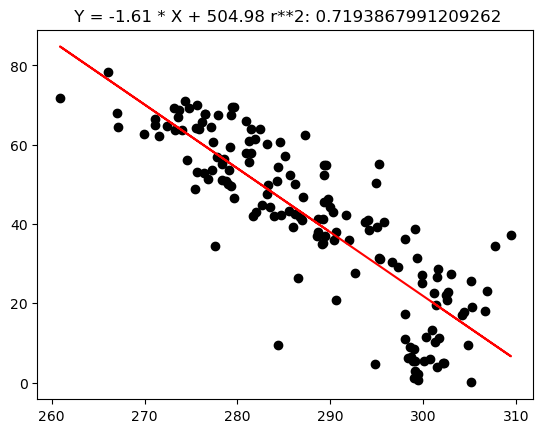

In [46]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df["Max Temp"], northern_hemi_df["Lat"], c="k")

(slope, y_intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Max Temp"], northern_hemi_df["Lat"])
print(f" Y = {round(slope, 2)} * X + {round(y_intercept, 2)} r**2: {rvalue**2}")

plt.title(f" Y = {round(slope, 2)} * X + {round(y_intercept, 2)} r**2: {rvalue**2}")

x_values = northern_hemi_df["Max Temp"]
y_values = x_values * slope + y_intercept

plt.plot(x_values, y_values, color="red")

 Y = 1.84 * X + -562.89


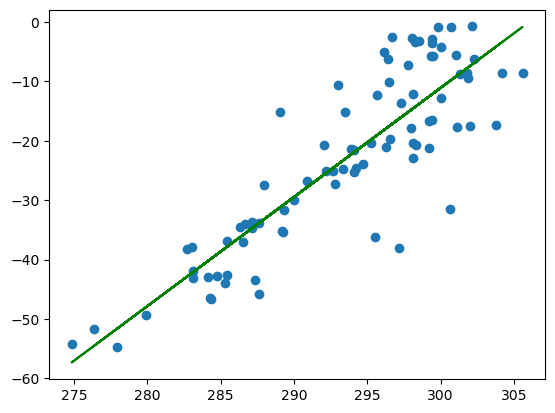

In [38]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df["Max Temp"], southern_hemi_df["Lat"])

(slope, y_intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Max Temp"], southern_hemi_df["Lat"])
print(f" Y = {round(slope, 2)} * X + {round(y_intercept, 2)}" )

x_values2 = southern_hemi_df["Max Temp"]
y_values2 = x_values2 * slope + y_intercept

plt.plot(x_values2, y_values2, color="green")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

 Y = 0.2 * X + 26.53


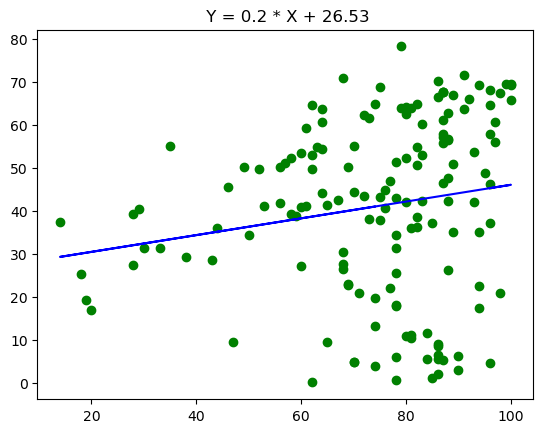

In [49]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Humidity"], northern_hemi_df["Lat"], c="g")

(slope, y_intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Humidity"], northern_hemi_df["Lat"])
print(f" Y = {round(slope, 2)} * X + {round(y_intercept, 2)}" )

plt.title(f" Y = {round(slope, 2)} * X + {round(y_intercept, 2)}")

x_values3 = northern_hemi_df["Humidity"]
y_values3 = x_values3 * slope + y_intercept

plt.plot(x_values3, y_values3, color="blue")

 Y = 0.08 * X + -28.97


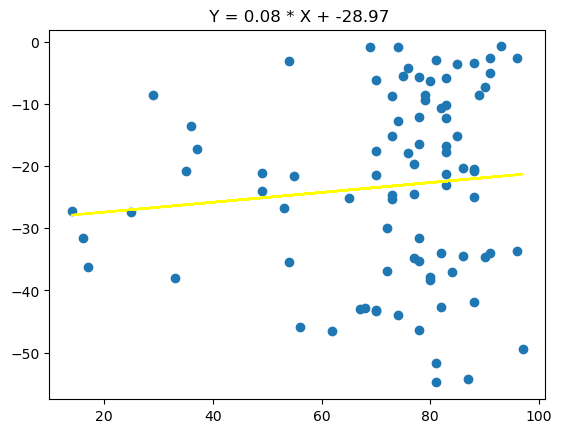

In [50]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Humidity"], southern_hemi_df["Lat"])

(slope, y_intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Humidity"], southern_hemi_df["Lat"])
print(f" Y = {round(slope, 2)} * X + {round(y_intercept, 2)}" )

plt.title(f" Y = {round(slope, 2)} * X + {round(y_intercept, 2)}")

x_values4 = southern_hemi_df["Humidity"]
y_values4 = x_values4 * slope + y_intercept

plt.plot(x_values4, y_values4, color="yellow")

**Discussion about the linear relationship:** 

The humidity has no linear relationship with the latitude of a place, at least the scatter plots obtained in this study case are not conclusive to find a clear linear relation.

The humidity have a different kind of relation, not linear but probably a polynomial model, this is because it should not only depend in the latitude, but in other parameters not considered here. 

### Cloudiness vs. Latitude Linear Regression Plot

 Y = 0.12 * X + 33.72, r**2: 0.04878553131010444


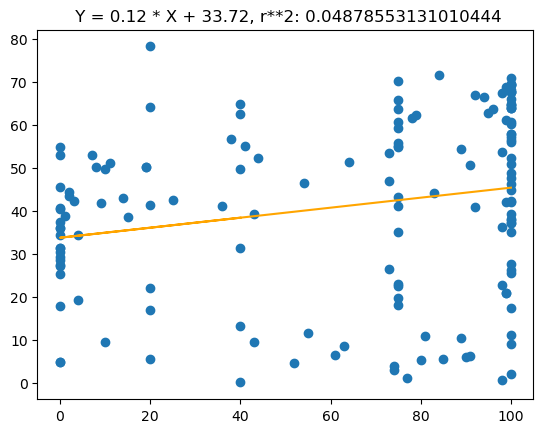

In [51]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Cloudiness"], northern_hemi_df["Lat"])

(slope, y_intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Cloudiness"], northern_hemi_df["Lat"])
print(f" Y = {round(slope, 2)} * X + {round(y_intercept, 2)}, r**2: {rvalue**2}")

plt.title(f" Y = {round(slope, 2)} * X + {round(y_intercept, 2)}, r**2: {rvalue**2}" )
x_values5 = northern_hemi_df["Cloudiness"]
y_values5 = x_values5 * slope + y_intercept

plt.plot(x_values5, y_values5, color="orange")

 Y = 0.03 * X + -24.72


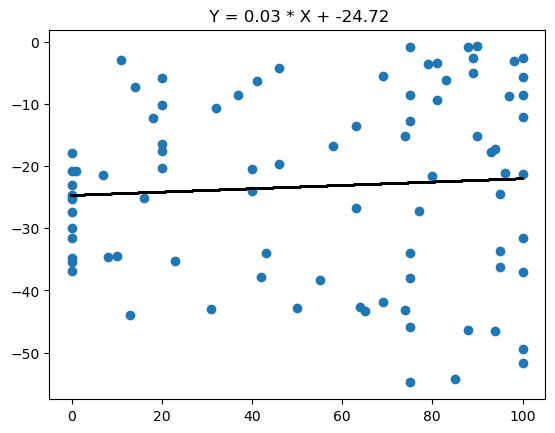

In [53]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Cloudiness"], southern_hemi_df["Lat"])

(slope, y_intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Cloudiness"], southern_hemi_df["Lat"])
print(f" Y = {round(slope, 2)} * X + {round(y_intercept, 2)}" )

plt.title(f" Y = {round(slope, 2)} * X + {round(y_intercept, 2)}" )

x_values6 = southern_hemi_df["Cloudiness"]
y_values6 = x_values6 * slope + y_intercept

plt.plot(x_values6, y_values6, color="black")

**Discussion about the linear relationship:** 

The Cloudiness is a meassure that has no relationship at all with Latitude, accordingly to the observations with the last scatter plots. 

### Wind Speed vs. Latitude Linear Regression Plot

 Y = 1.06 * X + 37.08


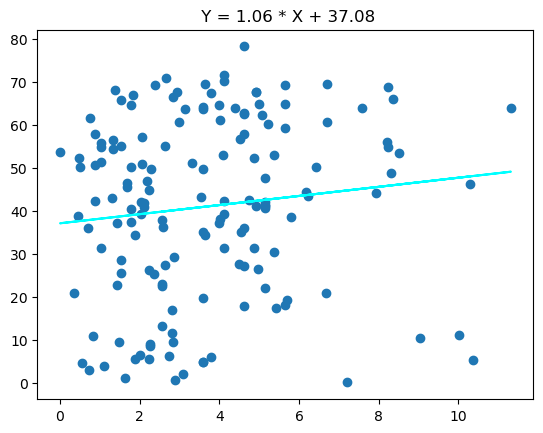

In [54]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Wind Speed"], northern_hemi_df["Lat"])

(slope, y_intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Wind Speed"], northern_hemi_df["Lat"])
print(f" Y = {round(slope, 2)} * X + {round(y_intercept, 2)}" )

plt.title(f" Y = {round(slope, 2)} * X + {round(y_intercept, 2)}" )

x_values7 = northern_hemi_df["Wind Speed"]
y_values7 = x_values7 * slope + y_intercept

plt.plot(x_values7, y_values7, color="cyan")

 Y = -0.86 * X + -19.59


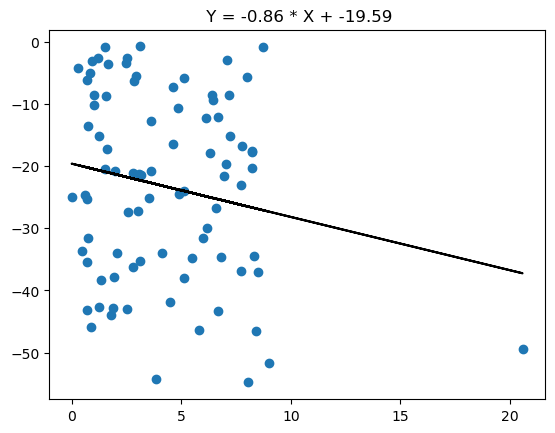

In [55]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Wind Speed"], southern_hemi_df["Lat"])

(slope, y_intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Wind Speed"], southern_hemi_df["Lat"])
print(f" Y = {round(slope, 2)} * X + {round(y_intercept, 2)}" )

plt.title(f" Y = {round(slope, 2)} * X + {round(y_intercept, 2)}" )

x_values8 = southern_hemi_df["Wind Speed"]
y_values8 = x_values8 * slope + y_intercept

plt.plot(x_values8, y_values8, color="black")

**Discussion about the linear relationship:** 

It could be appearent that a higher value of Latitude represent less incurrencies in values of Wind Speed, but this could be an error in interpretation. The most probable situation either in the North Hemisphere or in the South, is that at a higher value of Latitude are less habitable cities because the harsh conditions.

We can observe with the Temperature vs Latitude linear regression plots for both hemispheres a difference in the inclination of slope. In one hand we have the North Hemisphere with clear negative slope, this is expected because we locate more north from tropics in the Terrestrial Globe we could reach colder temperatures and this is a tendency independent of the time of the year. The opposite it is supposed to happen in the South hemisphere, while you go to the North in the Latitude axis until you aproximate the Ecuator the Temperature will be warmer. 

In the case of Humidity vs Latitude there is independent from the Latitude and we can observe that in the linear regression plots of the Hemispheres. 